### **Importing Modules** <a id="4"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import data manipulation libraries
import pandas as pd
import numpy as np

#Import the required Machine learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV


import keras
import tensorflow as tf
import pandas.api.types as ptypes
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#Import the visualization libraries
import seaborn as sn
import matplotlib.pyplot as plt

#import access
import os

#Report
import tensorboard
import time

#Time
import datetime as datetime
print(tf.__version__)

2.6.0


### **Importing Datasets** <a id="4"></a>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Seminar Fisika/Data finished_finished.csv")

### **Glancing at Datasets** <a id="4"></a>

In [ ]:
df
df2=df

In [ ]:
df.duplicated().values.any()

True

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25825    False
25826    False
25827    False
25828    False
25829    False
Length: 25830, dtype: bool

In [ ]:
df = df.drop('co2ppmCorrected', 1)
df = df.drop('co2ppmPureSens', 1)
df = df.drop('z_counter', 1)
df = df.drop('_key', 1)

In [ ]:
x = df.copy(deep=True)
df_model = df.copy(deep=True)
df

,Ts,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
0,1635147131999,71.6,215,0,97,27.8125,29.5
1,1635147191641,72.8,217,0,96,27.8125,29.5
2,1635147221444,73.2,208,0,96,27.8125,29.5
3,1635147251257,72.8,210,0,96,27.8125,29.5
4,1635148033290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...,...
25825,1635835481925,93.1,608,0,83,27.6250,26.8
25826,1635835511753,93.2,623,0,83,27.5625,26.9
25827,1635835542535,93.1,628,0,83,27.5625,26.9
25828,1635835571752,92.6,643,0,82,27.5625,26.8


In [ ]:
# df = df.drop_duplicates() 
# df.duplicated().values.any()

In [ ]:
df = df.fillna(method="ffill")
pd.isnull(df).any()  # Checking for Null Values

Ts             False
humidity       False
lightStats     False
pumpStatus     False
soilHum        False
soilTemp       False
temperature    False
dtype: bool

In [ ]:
df

,Ts,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
0,1635147131999,71.6,215,0,97,27.8125,29.5
1,1635147191641,72.8,217,0,96,27.8125,29.5
2,1635147221444,73.2,208,0,96,27.8125,29.5
3,1635147251257,72.8,210,0,96,27.8125,29.5
4,1635148033290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...,...
25825,1635835481925,93.1,608,0,83,27.6250,26.8
25826,1635835511753,93.2,623,0,83,27.5625,26.9
25827,1635835542535,93.1,628,0,83,27.5625,26.9
25828,1635835571752,92.6,643,0,82,27.5625,26.8


In [ ]:
# df['avgHum']=(df['humidity']+df['soilHum'])/2
# df['avgTemp']=(df['temperature']+df['soilTemp'])/2

In [ ]:
df.shape

(25830, 7)

### **Changing Timestamp to Normal Time** <a id="4"></a>


In [ ]:
df['Ts'] = pd.to_datetime(df['Ts'],unit='ms')

In [ ]:
df

,Ts,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
0,2021-10-25 07:32:11.999,71.6,215,0,97,27.8125,29.5
1,2021-10-25 07:33:11.641,72.8,217,0,96,27.8125,29.5
2,2021-10-25 07:33:41.444,73.2,208,0,96,27.8125,29.5
3,2021-10-25 07:34:11.257,72.8,210,0,96,27.8125,29.5
4,2021-10-25 07:47:13.290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...,...
25825,2021-11-02 06:44:41.925,93.1,608,0,83,27.6250,26.8
25826,2021-11-02 06:45:11.753,93.2,623,0,83,27.5625,26.9
25827,2021-11-02 06:45:42.535,93.1,628,0,83,27.5625,26.9
25828,2021-11-02 06:46:11.752,92.6,643,0,82,27.5625,26.8


In [ ]:
df3=df.copy(deep=True)

In [ ]:
df3

,Ts,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
0,2021-10-25 07:32:11.999,71.6,215,0,97,27.8125,29.5
1,2021-10-25 07:33:11.641,72.8,217,0,96,27.8125,29.5
2,2021-10-25 07:33:41.444,73.2,208,0,96,27.8125,29.5
3,2021-10-25 07:34:11.257,72.8,210,0,96,27.8125,29.5
4,2021-10-25 07:47:13.290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...,...
25825,2021-11-02 06:44:41.925,93.1,608,0,83,27.6250,26.8
25826,2021-11-02 06:45:11.753,93.2,623,0,83,27.5625,26.9
25827,2021-11-02 06:45:42.535,93.1,628,0,83,27.5625,26.9
25828,2021-11-02 06:46:11.752,92.6,643,0,82,27.5625,26.8


In [ ]:
df.set_index('Ts', inplace=True)

In [ ]:
df

,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
Ts,,,,,,
2021-10-25 07:32:11.999,71.6,215,0,97,27.8125,29.5
2021-10-25 07:33:11.641,72.8,217,0,96,27.8125,29.5
2021-10-25 07:33:41.444,73.2,208,0,96,27.8125,29.5
2021-10-25 07:34:11.257,72.8,210,0,96,27.8125,29.5
2021-10-25 07:47:13.290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...
2021-11-02 06:44:41.925,93.1,608,0,83,27.6250,26.8
2021-11-02 06:45:11.753,93.2,623,0,83,27.5625,26.9
2021-11-02 06:45:42.535,93.1,628,0,83,27.5625,26.9


In [ ]:
df.shape

(25830, 6)

In [ ]:
# df['Ts'] = df['Ts'].apply(lambda x: pd.Timestamp(x).strftime('%H:%M:%S'))

In [ ]:
# df

### **Data Visualization** <a id="4"></a>

##### **Suhu Tanah Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.plot_date(df['Ts'], df['soilTemp'])
# plt.title('Grafik Suhu Tanah berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Temperatur Tanah')
# plt.tight_layout()

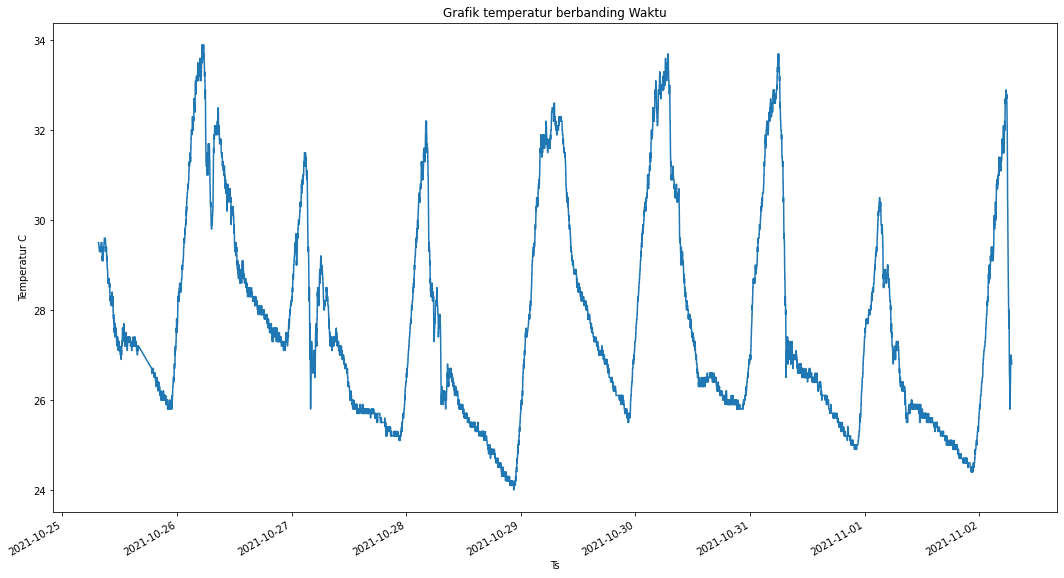

In [ ]:
plt.figure(figsize=(18,10))
temperatur = df['temperature']

plt.title('Grafik temperatur berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Temperatur C')
temperatur.plot()

##### **Suhu Udara Berbanding Waktu**


In [ ]:
# plt.figure(figsize=(18,10))
# plt.plot_date(df['Ts'], df['temperature'])
# plt.title('Grafik Suhu Udara berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Temperatur Udara')
# plt.tight_layout()

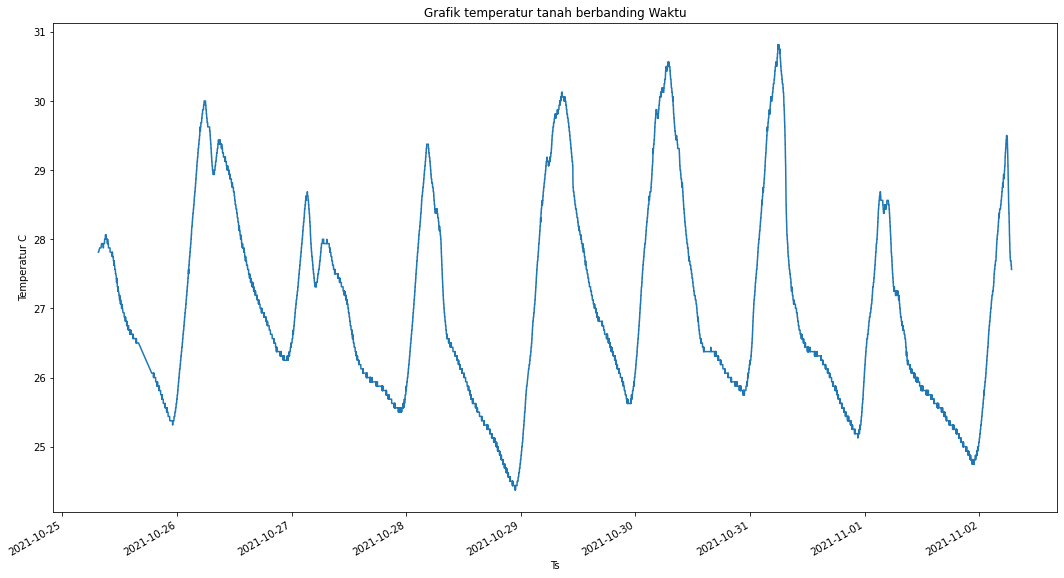

In [ ]:
plt.figure(figsize=(18,10))
temperaturSoil = df['soilTemp']

plt.title('Grafik temperatur tanah berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Temperatur C')
temperaturSoil.plot()

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['temperature'], df['soilTemp'])
# plt.title('Perbandingan Suhu Tanah dan Udara')
# plt.xlabel('Temperatur Udara')
# plt.ylabel('Temperatur Tanah')

##### **Suhu Berbanding Waktu**


In [ ]:
# plt.figure(figsize=(18,10))
# plt.plot_date(df['Ts'], df['temperature'], color='red', )
# plt.plot_date(df['Ts'], df['soilTemp'], color='blue')
# plt.title('Grafik Suhu berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Temperatur')
# plt.tight_layout()

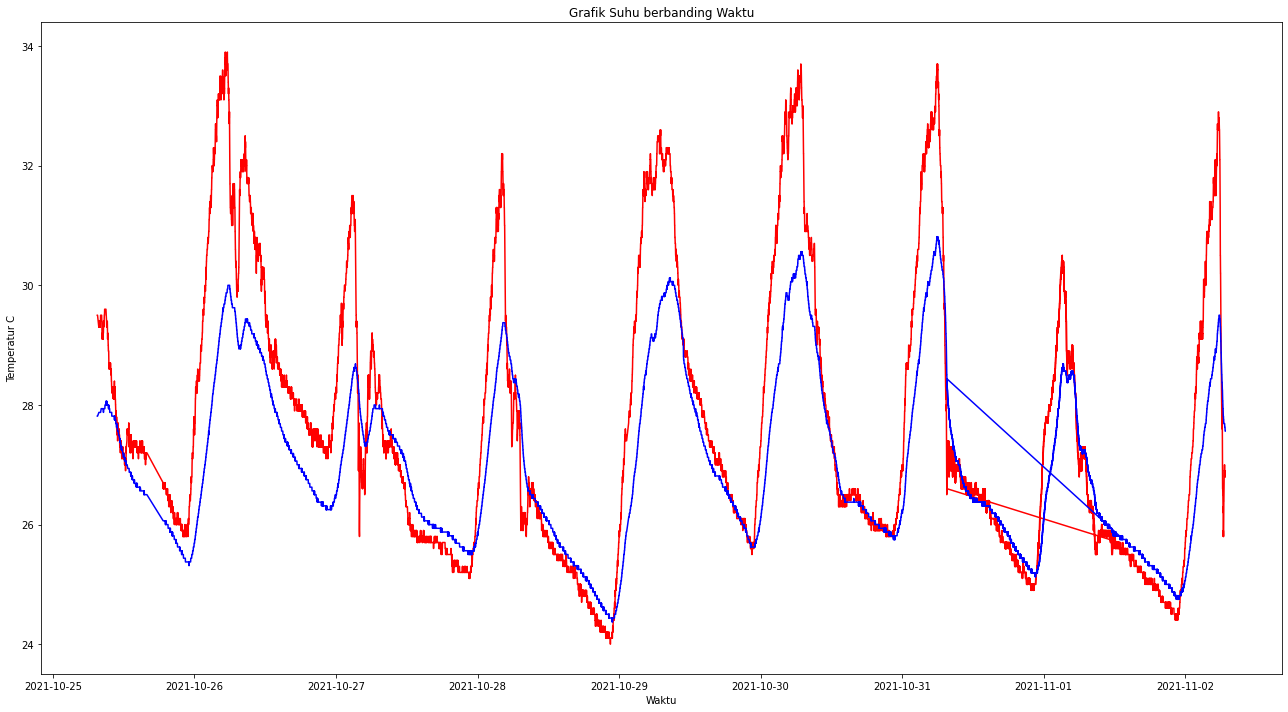

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df['temperature'], color='red', )
plt.plot(df['soilTemp'], color='blue')
plt.title('Grafik Suhu berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Temperatur C')
plt.tight_layout()

##### **Kelembaban Tanah Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['Ts'], df['soilHum'])
# plt.title('Grafik Kelembaban Tanah berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Kelembaban Tanah')
# plt.tight_layout()

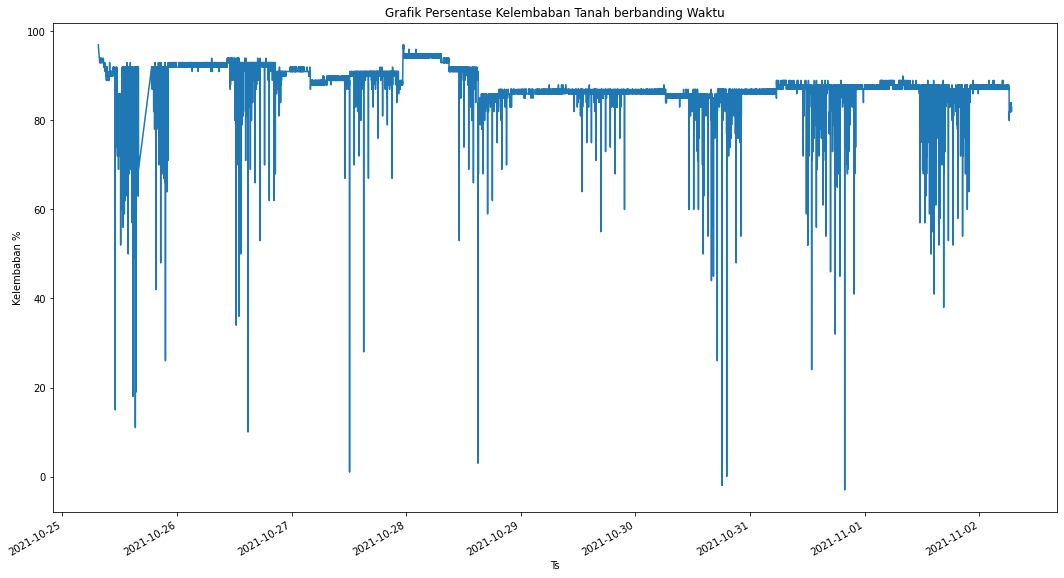

In [ ]:
plt.figure(figsize=(18,10))
humidity = df['soilHum']

plt.title('Grafik Persentase Kelembaban Tanah berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
humidity.plot()

##### **Kelembaban Udara Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['Ts'], df['humidity'])
# plt.title('Grafik Kelembaban Udara berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Kelembaban Udara')
# plt.tight_layout()

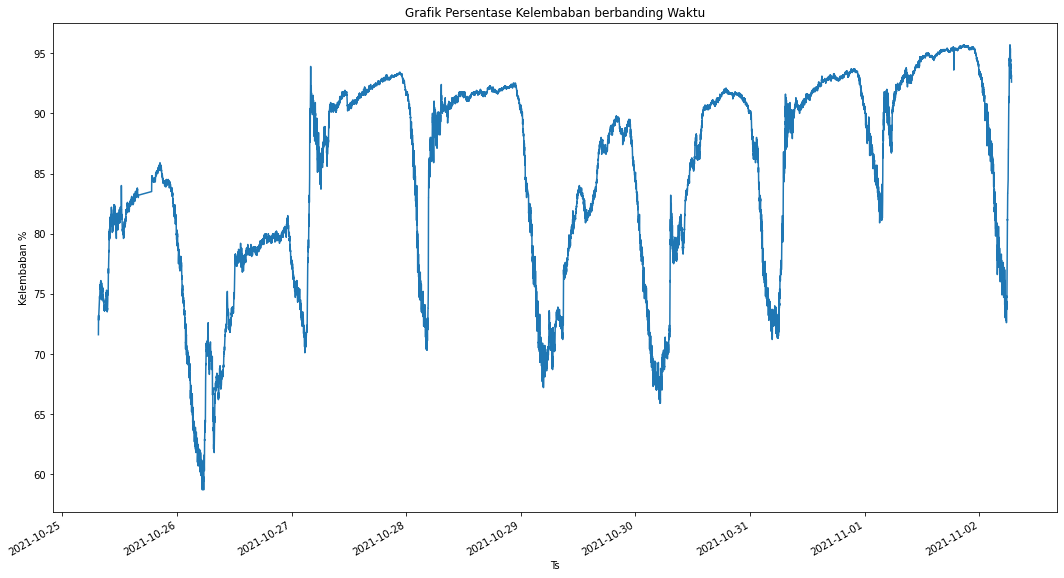

In [ ]:
plt.figure(figsize=(18,10))
humidity = df['humidity']

plt.title('Grafik Persentase Kelembaban berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
humidity.plot()

##### **Kelembaban Berbanding Waktu**


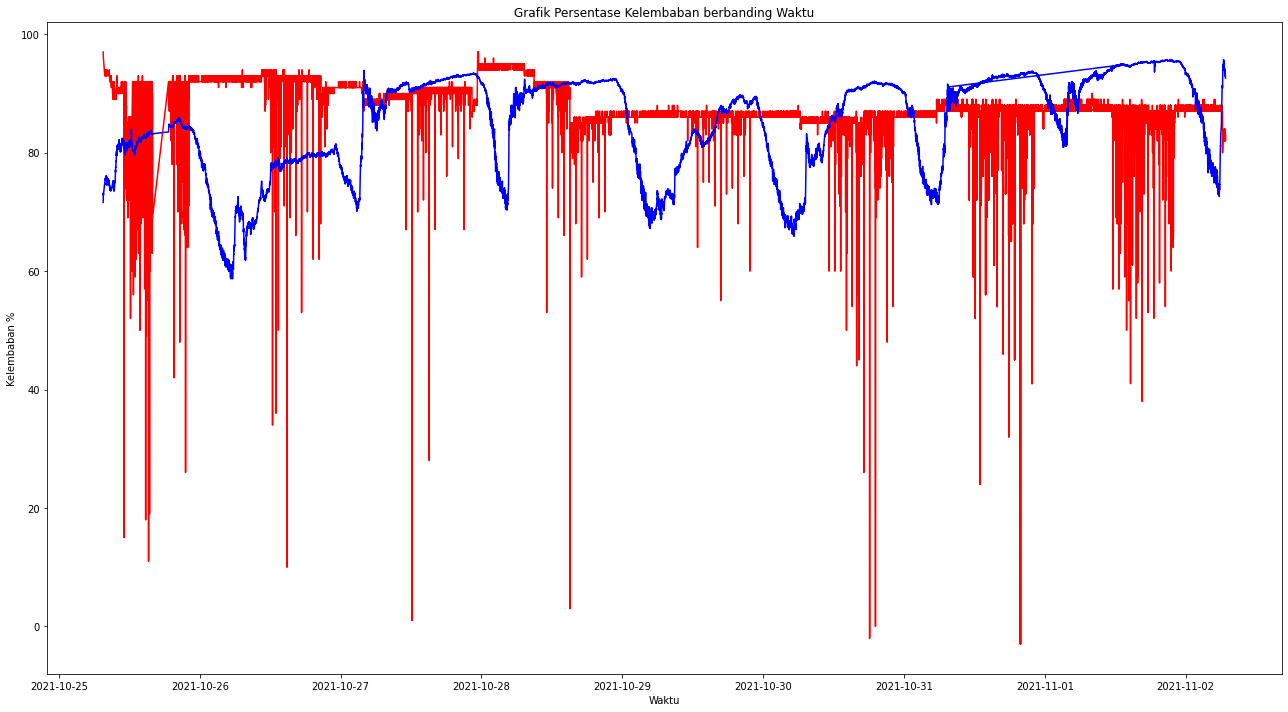

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df['soilHum'], color='red', )
plt.plot(df['humidity'], color='blue')
plt.title('Grafik Persentase Kelembaban berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
plt.tight_layout()

##### **Nilai LDR Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['Ts'], df['lightStats'])
# plt.title('Grafik Nilai LDR berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('LDR')
# plt.tight_layout()

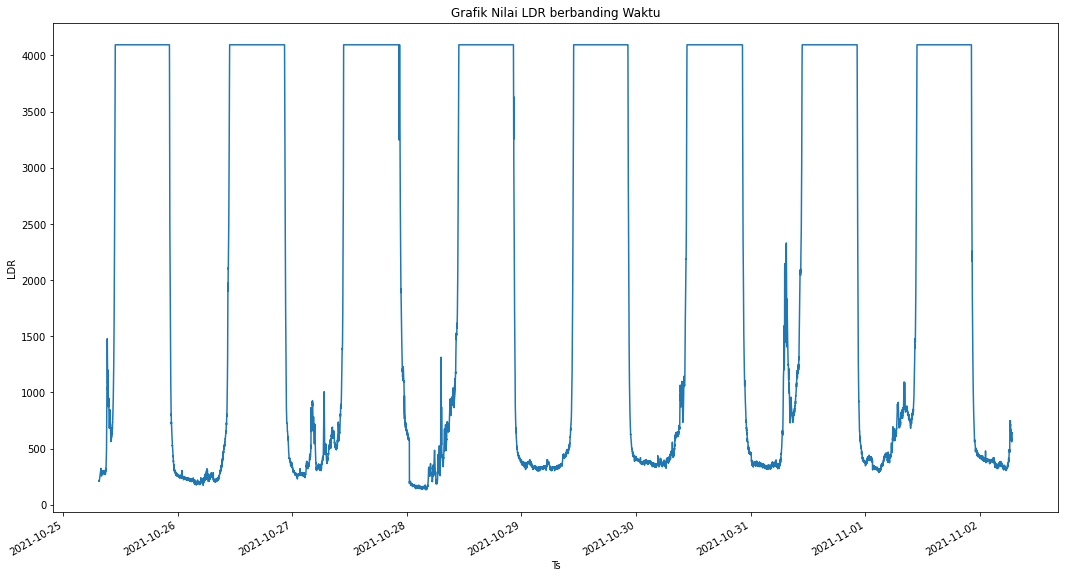

In [ ]:
LDROutput = df['lightStats']
plt.figure(figsize=(18,10))


plt.title('Grafik Nilai LDR berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('LDR')
LDROutput.plot()

##### **Pump Status** 

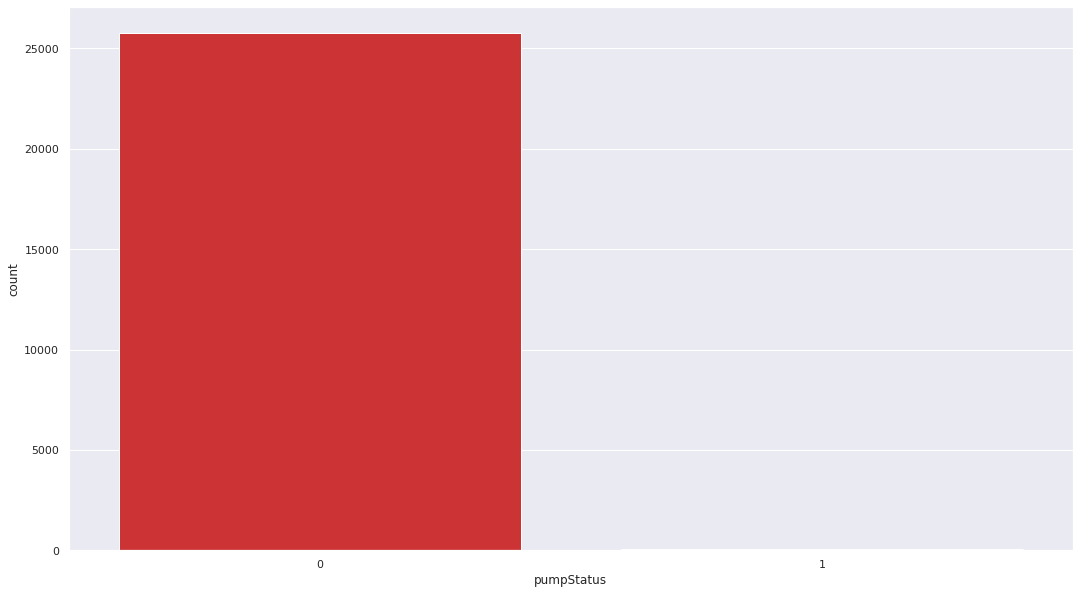

In [ ]:
plt.figure(figsize=(18,10))
sn.set(style="darkgrid")
ax = sn.countplot(x="pumpStatus", data=df, palette="Set1")

In [ ]:
df2['pumpStatus'].value_counts()

0    25787
1       43
Name: pumpStatus, dtype: int64

#### **Heatmapped Data** <a id="4"></a>

In [ ]:
y = df['pumpStatus']
# x = x.drop('pumpStatus',axis=1)
x

,Ts,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
0,1635147131999,71.6,215,0,97,27.8125,29.5
1,1635147191641,72.8,217,0,96,27.8125,29.5
2,1635147221444,73.2,208,0,96,27.8125,29.5
3,1635147251257,72.8,210,0,96,27.8125,29.5
4,1635148033290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...,...
25825,1635835481925,93.1,608,0,83,27.6250,26.8
25826,1635835511753,93.2,623,0,83,27.5625,26.9
25827,1635835542535,93.1,628,0,83,27.5625,26.9
25828,1635835571752,92.6,643,0,82,27.5625,26.8


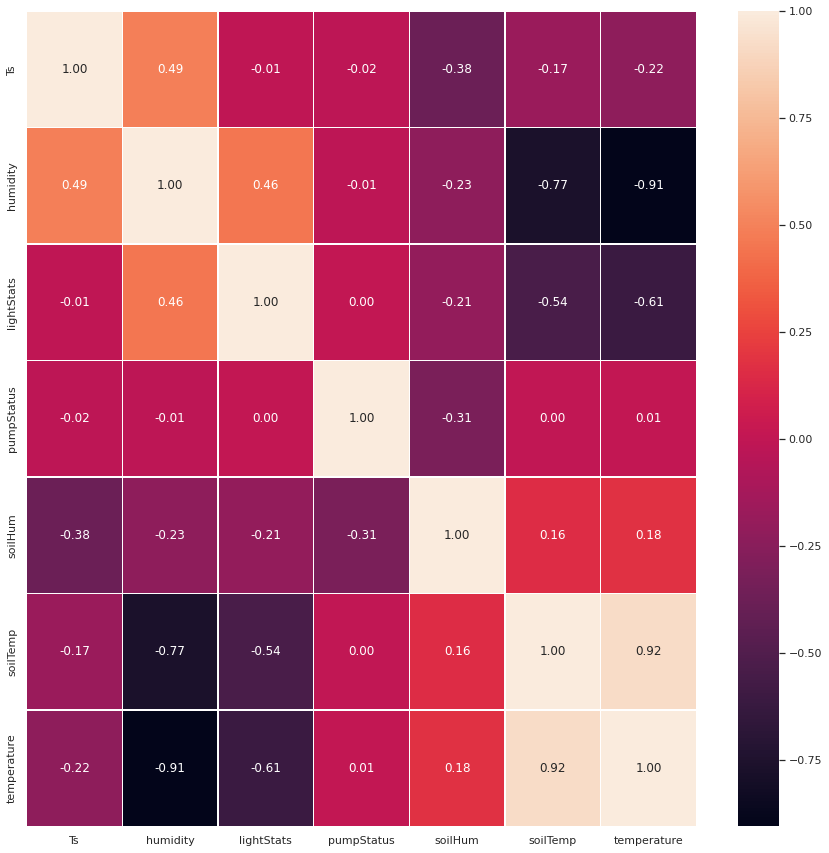

In [ ]:
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sn.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

### **Splitting Data** <a id="4"></a>

In [ ]:
feature_cols = ['Ts','humidity','lightStats','soilHum','soilTemp','temperature']
X = x[feature_cols] # features for the prediction
y = df2.pumpStatus

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =0)
display(X_train.shape, y_train.shape, X_test.shape, y_test)

(20664, 6)

(20664,)

(5166, 6)

19627    0
20721    0
24231    0
13152    0
4036     0
        ..
23264    0
11469    0
15002    0
11942    0
15611    0
Name: pumpStatus, Length: 5166, dtype: int64

### **Testing using Feature Column** <a id="4"></a>

In [ ]:
feat_cols = []
df = X_train
for col in df.columns:
  if ptypes.is_string_dtype(df[col]): #is_string_dtype is pandas function
    feat_cols.append(tf.feature_column.categorical_column_with_hash_bucket(col, 
        hash_bucket_size= len(df[col].unique())))

  elif ptypes.is_numeric_dtype(df[col]): #is_numeric_dtype is pandas function
    feat_cols.append(tf.feature_column.numeric_column(col))

In [ ]:
print(feat_cols)

[NumericColumn(key='Ts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='humidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='lightStats', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='soilHum', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='soilTemp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='temperature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
classifier = tf.estimator.DNNClassifier(
        feature_columns=feat_cols,
        # Two hidden layers of 20 nodes each.
        hidden_units=[20, 20],
        # The model must choose between 2 classes.
        n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0j_g28z1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=500, shuffle=True)

In [ ]:
classifier.train(input_fn=input_func, steps=10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0j_g28z1/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss 

In [ ]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False) 
# Prediction is done here now.
predictions = list(classifier.predict(input_fn=pred_fn))
predictions[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0j_g28z1/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.], dtype=float32),
 'logits': array([-4.7391375e+09], dtype=float32),
 'probabilities': array([1., 0.], dtype=float32)}

In [ ]:
final_preds = []
for pred in predictions:
    #info = "{} {} {}".format(pred['class_ids'][0], pred['probabilities'][0] , pred['probabilities'][1])
    final_preds.append(pred['class_ids'][0])
    #final_preds.append(info)

In [ ]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5158
           1       0.00      0.00      0.00         8

    accuracy                           1.00      5166
   macro avg       0.50      0.50      0.50      5166
weighted avg       1.00      1.00      1.00      5166



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic Regression <a id="4"></a>

In [ ]:
# Instantiate the model using the default parameters
lr = LogisticRegression()

#fit the model with the data
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5158,    0],
       [   8,    0]])

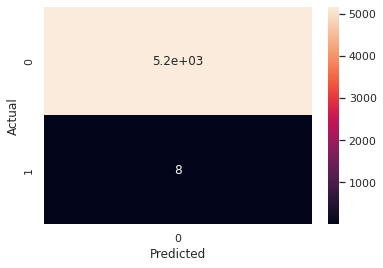

In [ ]:
cnf_matrix = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cnf_matrix, annot=True)

In [ ]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)
print('Accuracy score : ', accuracyScore)
print("Accuracy in Percentage : ", int(accuracyScore*100),'%')

Accuracy score :  0.9984514130855594
Accuracy in Percentage :  99 %


#### Model Evaluation <a id="14"></a>

<hr>   

* Now we have selected our model with better hyper parameters than default ones.
* It is time to evaluate model with our test set

In [ ]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(X_train, y_train)
print("Test accuracy: ",logreg_best.score(X_test, y_test))

Test accuracy:  0.9994192799070848


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)

print("Basic KNN Accuracy: % {}".format(acc))
print("Score : ", score)
print("CM : ", cm)

Basic KNN Accuracy: % 0.9986449864498645
Score :  0.9986449864498645
CM :  [[5158    0]
 [   7    1]]


In [ ]:
def KNN_Best_Params(X_train, X_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
     
    knn = KNeighborsClassifier()
    
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(X_train, y_train)
    
    print("Best training score : {} with paremeters : {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) # best paremetre olarak gelen değerlerimiz.
    knn.fit(X_train, y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test) 
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid

In [ ]:
grid = KNN_Best_Params(X_train, X_test, y_train, y_test) 


Best training score : 0.998790213238879 with paremeters : {'n_neighbors': 10, 'weights': 'distance'}

Test Score: 0.9984514130855594, Train Score: 1.0

CM Test:  [[5158    0]
 [   8    0]]
CM Train:  [[20629     0]
 [    0    35]]


The ultimate success of our model in predicting the test set that has not been used in training is 0.99

#### F1 Score <a id="17"></a>
<hr>

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

,Precision,Recall,F1 Score
Results,1.0,0.125,0.222222


1. High precision relates to the low false positive rate
1. High recall relates to the low false negative rate

### **Create, compile, and train the model** <a id="4"></a>

In [ ]:
df_model

,Ts,humidity,lightStats,pumpStatus,soilHum,soilTemp,temperature
0,1635147131999,71.6,215,0,97,27.8125,29.5
1,1635147191641,72.8,217,0,96,27.8125,29.5
2,1635147221444,73.2,208,0,96,27.8125,29.5
3,1635147251257,72.8,210,0,96,27.8125,29.5
4,1635148033290,74.8,275,0,93,27.8750,29.3
...,...,...,...,...,...,...,...
25825,1635835481925,93.1,608,0,83,27.6250,26.8
25826,1635835511753,93.2,623,0,83,27.5625,26.9
25827,1635835542535,93.1,628,0,83,27.5625,26.9
25828,1635835571752,92.6,643,0,82,27.5625,26.8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x = df_model.drop('pumpStatus',axis=1)
y = df_model['pumpStatus']
le = LabelEncoder()
y = le.fit_transform(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, shuffle = True, stratify=y)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.02, shuffle = True,)
print(len(x_train), 'train examples')
print(len(x_test), 'test examples')
print(len(x_val), 'val examples')
print(len(y_train), 'train examples')
print(len(y_test), 'test examples')
print(len(y_val), 'train examples')

20250 train examples
5166 test examples
414 val examples
20250 train examples
5166 test examples
414 train examples


In [ ]:
x_train.shape,x_test.shape,x_val.shape,y_train.shape,y_test.shape,y_val.shape

((20250, 6), (5166, 6), (414, 6), (20250,), (5166,), (414,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [ ]:
x_train = x_train.reshape(20250,6,1)
x_test = x_test.reshape(5166,6,1)
x_val = x_val.reshape(414,6,1)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv1D(filters=64,kernel_size=1,activation='ReLU',input_shape=(6,1)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation = 'ReLU'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = 'ReLU'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(128, activation = 'ReLU'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             128       
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 64)             256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 6, 64)             4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 64)             256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import datetime, os
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    verbose=1,
                    epochs=2, callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/2
633/633 [==============================] - 5s 6ms/step - loss: 0.0262 - accuracy: 0.9983 - val_loss: 0.0170 - val_accuracy: 0.9983
Epoch 2/2
633/633 [==============================] - 4s 6ms/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 0.0089 - val_accuracy: 0.9983


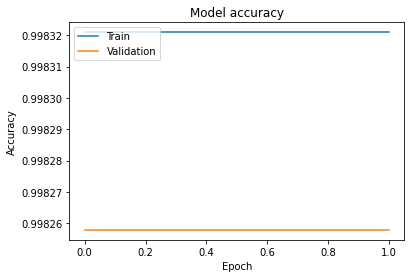

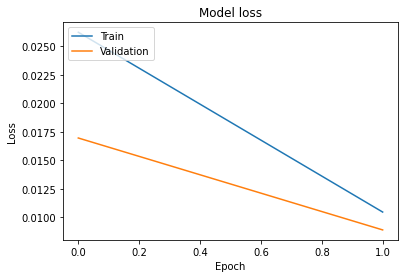

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model.predict(x_val)

array([[2.36949325e-03],
       [5.34436076e-05],
       [9.58234072e-04],
       [4.05470491e-05],
       [1.94719434e-03],
       [2.38546729e-03],
       [1.27166510e-03],
       [3.62604856e-03],
       [2.65866518e-04],
       [1.79427862e-03],
       [1.41736865e-03],
       [1.21194124e-03],
       [4.73380089e-04],
       [1.34706497e-04],
       [2.72629986e-05],
       [7.29084015e-04],
       [3.80522013e-03],
       [1.22463703e-03],
       [1.55955553e-04],
       [2.02009082e-03],
       [6.56366348e-04],
       [2.31832266e-04],
       [2.83148885e-03],
       [1.38169527e-03],
       [2.02417374e-04],
       [1.50352716e-04],
       [6.08086586e-04],
       [5.13234735e-03],
       [1.15215778e-03],
       [2.52524018e-03],
       [1.64885759e-01],
       [4.05728817e-04],
       [2.35766172e-04],
       [3.76974940e-02],
       [2.03195214e-03],
       [3.73831391e-03],
       [6.20126724e-04],
       [6.09397888e-04],
       [2.41219997e-04],
       [2.15858221e-04],


In [ ]:
model.save('model.h5')
print("ModelSaved")

ModelSaved
